Сначала определим функцию, которая считает сумму цифр в числе. 
Сделаем проверку на корректность введного номера клиента, т.к. в условии сказано, что номер содержит 5-7 цифр.
Смещаемся по разрядам при помощи деления на 10, суммируем остатки от деления.
На выходе имеем число, которое и определяет номер тестовой группы, куда попадает наш клиент.

In [10]:
def getGroupNumber(clientID):
    if len(clientID) not in range(5,8):
        print('Invalid client ID!')
    else:
        number = int(clientID)
        dsum = 0
        while number:
            dsum, number = dsum + number % 10, number // 10
        return dsum

Проверяем работу функции на примере из задания. 

In [12]:
print(getGroupNumber('7412567'))

32


Создаем две копии функции-диагностики.
В первой нумерация начинается с '00000'. Нумерация сквозная, то есть номер следующего клиента отличается от предыдущего на 1.
На всякий случай проверяем, сколько у нас всего клиентов, чтобы определить, какую длину строки нам бронировать под clientID.
Во второй функции нумерация тоже скозная (исходя из условия задачи), только начинается она с указанного пользователем числа.
Здесь делаем аналогичную проверку на предмет того, не перейдем ли мы на следующий разряд при присваивании номеров нашим клиентам.

В обоих функциях в цикле бежим по номерам клиентов и раскидываем их по группам. На выходе имеем одномерный массив, в котором индекс элемента является номером тестовой группы,
а значение элемента -- количество клиентов, попавших в эту группу.
Массив изначально создается длины 64, т.к. всего у нас может быть 64 тестовые группы (максимальная сумма цифр 7*9=63, минимальная 0)

In [13]:
import numpy as np
def getGroupDistribution1(n_customers):
    groups = np.zeros(64)
    if (n_customers <= 99999):
        formatID = '{:05d}'
    elif (n_customers <= 999999):
        formatID = '{:06d}'
    else:
        formatID = '{:07d}'
        
    for i in range(n_customers):
        groups[getGroupNumber(formatID.format(i) )]+=1
    return groups
    
def getGroupDistribution2(n_customers, n_first_id):
    groups = np.zeros(64)
    if (n_customers + int(n_first_id) <= 99999):
        formatID = '{:05d}'
    elif (n_customers + int(n_first_id) <= 999999):
        formatID = '{:06d}'
    else:
        formatID = '{:07d}'
        
    for i in range(int(n_first_id),int(n_first_id) + n_customers):
        groups[getGroupNumber(formatID.format(i) )]+=1
    return groups

Для наглядности выводим результат из двух функций

In [14]:
print(getGroupDistribution1(1000))

[ 1.  3.  6. 10. 15. 21. 28. 36. 45. 55. 63. 69. 73. 75. 75. 73. 69. 63.
 55. 45. 36. 28. 21. 15. 10.  6.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [15]:
print(getGroupDistribution2(1000,'7412567'))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  6.
 10. 15. 22. 30. 39. 49. 59. 67. 74. 78. 80. 79. 75. 69. 62. 51. 41. 31.
 23. 16. 10.  6.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


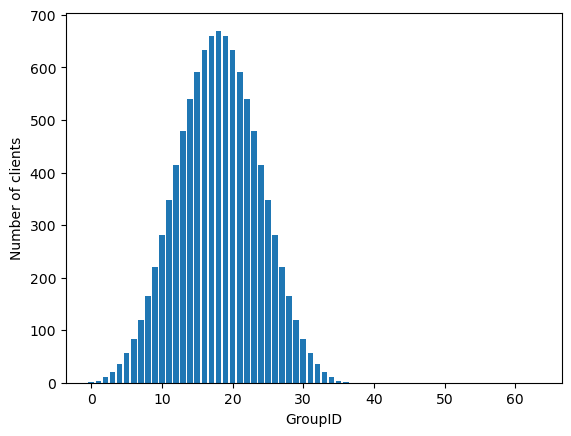

In [16]:
import matplotlib.pyplot as plt

plt.bar(np.arange(64),getGroupDistribution1(10000)) 
plt.ylabel('Number of clients')
plt.xlabel('GroupID');

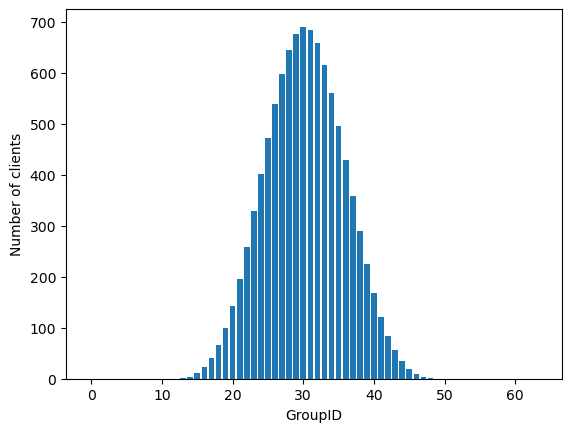

In [25]:
plt.bar(np.arange(64),getGroupDistribution2(10000,'7412567')) 
plt.ylabel('Number of clients')
plt.xlabel('GroupID');

Видно, что по смыслу обе функции работают одинаково: раскидывают клиентов по группам с нормальным распределением. Оно и понятно, принцип работы обеих функий одинаковый, вряд ли стоило ожидать разных результатов. Но во втором случае выбором начального номера клиента мы можем двигать центр нашего распределения по группам.